In [38]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Import data

cust_df = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/customer_data.csv")
paym_df = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/payment_data.csv")

In [41]:
cust_df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [42]:
paym_df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


### EDA

In [43]:
cust_df.shape

(1125, 13)

In [44]:
paym_df.shape

(8250, 12)

In [45]:
# cust_df cleanup

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [46]:
cust_df.fea_2.fillna(cust_df.fea_2.mean(), inplace=True)

In [47]:
cust_df.duplicated().sum()

0

In [48]:
# paym_df cleanup

paym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [49]:
pay_df = paym_df.copy()

In [50]:
pay_df.drop(['prod_code','update_date','report_date'], axis=1, inplace=True)

In [51]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_limit       2132 non-null   float64
 7   new_balance      8250 non-null   float64
 8   highest_balance  7841 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 580.2 KB


In [52]:
pay_df.highest_balance.fillna(pay_df.highest_balance.mean(), inplace=True)

In [53]:
pay_df.OVD_t1.value_counts()
pay_df.OVD_t2.value_counts()
pay_df.OVD_t3.value_counts()

,count
OVD_t3,
0,7983
1,46
2,35
3,22
35,15
6,14
5,13
34,12
4,12


In [54]:
pay_df.duplicated().sum()

119

In [55]:
pay_df.drop_duplicates(inplace=True)

In [56]:
df = cust_df.merge(pay_df, on='id', how='left')

In [57]:
df.shape

(8131, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8131 entries, 0 to 8130
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8131 non-null   int64  
 1   id               8131 non-null   int64  
 2   fea_1            8131 non-null   int64  
 3   fea_2            8131 non-null   float64
 4   fea_3            8131 non-null   int64  
 5   fea_4            8131 non-null   float64
 6   fea_5            8131 non-null   int64  
 7   fea_6            8131 non-null   int64  
 8   fea_7            8131 non-null   int64  
 9   fea_8            8131 non-null   int64  
 10  fea_9            8131 non-null   int64  
 11  fea_10           8131 non-null   int64  
 12  fea_11           8131 non-null   float64
 13  OVD_t1           8131 non-null   int64  
 14  OVD_t2           8131 non-null   int64  
 15  OVD_t3           8131 non-null   int64  
 16  OVD_sum          8131 non-null   int64  
 17  pay_normal    

In [59]:
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_limit,new_balance,highest_balance
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,151300,244.948974,0,0,0,0,9,60500.0,6657.6,18934.0
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,151300,244.948974,0,0,0,0,18,NaN,153792.0,149387.0
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,151300,244.948974,0,0,0,0,1,NaN,0.0,150500.0
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,151300,244.948974,0,2,26,11906,6,NaN,0.0,46371.0
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,341759,207.173840,0,0,0,0,4,NaN,15120.0,21500.0


In [60]:
df.duplicated().sum()

0

In [61]:
df.drop('id', inplace=True, axis=1)

In [62]:
df.duplicated().sum()

0

In [63]:
df.head()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_limit,new_balance,highest_balance
0,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,9,60500.0,6657.6,18934.0
1,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,18,NaN,153792.0,149387.0
2,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,1,NaN,0.0,150500.0
3,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,2,26,11906,6,NaN,0.0,46371.0
4,0,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840,0,0,0,0,4,NaN,15120.0,21500.0


In [64]:
# plt.figure(figsize=(12,10))
# sns.heatmap(df.corr(), annot=True)

In [65]:
df.prod_limit.fillna(df.prod_limit.mean(), inplace=True)

<Axes: xlabel='prod_limit', ylabel='Count'>

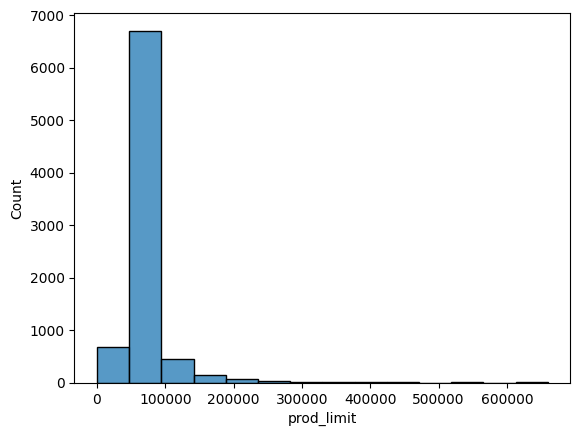

In [66]:
sns.histplot(df.prod_limit)

In [71]:
# standardise df and then put into a new dataframe

scaler = StandardScaler()
df_temp = df.drop('label', axis=1)
df_cols = df_temp.columns
df_temp = scaler.fit_transform(df_temp)
df_scaled = pd.DataFrame(df_temp, columns=df_cols)

In [72]:
df_scaled.head()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_limit,new_balance,highest_balance
0,-0.377272,-0.826666,0.765581,-0.571743,0.251857,1.471278,0.037202,0.712558,0.857314,-0.222279,0.761343,-0.198651,-0.147297,-0.127804,-0.104311,-0.463633,-6.663470e-01,-0.052546,-0.072914
1,-0.377272,-0.826666,0.765581,-0.571743,0.251857,1.471278,0.037202,0.712558,0.857314,-0.222279,0.761343,-0.198651,-0.147297,-0.127804,-0.104311,0.283421,3.827702e-16,0.024841,-0.025711
2,-0.377272,-0.826666,0.765581,-0.571743,0.251857,1.471278,0.037202,0.712558,0.857314,-0.222279,0.761343,-0.198651,-0.147297,-0.127804,-0.104311,-1.127682,3.827702e-16,-0.056048,-0.025308
3,-0.377272,-0.826666,0.765581,-0.571743,0.251857,1.471278,0.037202,0.712558,0.857314,-0.222279,0.761343,-0.198651,2.169284,8.777478,6.451006,-0.712652,3.827702e-16,-0.056048,-0.062986
4,-1.098891,-0.182179,-1.483314,-0.238913,0.251857,-1.122519,-1.942019,-0.004212,-1.430075,0.917322,0.451386,-0.198651,-0.147297,-0.127804,-0.104311,-0.878664,3.827702e-16,-0.048095,-0.071985


### Modeling

In [74]:
# Separating input and output features

X = df_scaled
y = df.label

In [75]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Cross validation

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [77]:
# Model

rf = RandomForestClassifier(random_state=42)
results = cross_val_score(rf, X, y, cv=k_fold)

In [78]:
results.mean()

0.9661784394256718

In [79]:
# With train test

y_pred = rf.fit(X_train, y_train).predict(X_test)

In [80]:
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print("Precision = ", metrics.precision_score(y_test, y_pred))
print("Recall = ", metrics.recall_score(y_test, y_pred))
print("F1 Score = ", metrics.f1_score(y_test, y_pred))

Accuracy =  0.9668100799016595
Precision =  0.9958333333333333
Recall =  0.8184931506849316
F1 Score =  0.8984962406015038


In [81]:
# train

results_train = cross_val_score(rf, X_train, y_train, cv=k_fold)
results_test = cross_val_score(rf, X_test, y_test, cv=k_fold)

print(results_train.mean())
print(results_test.mean())

0.9604861160345031
0.8715708551086874


In [82]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
3,fea_4,0.184223
1,fea_2,0.122496
9,fea_10,0.121709
7,fea_8,0.109413
10,fea_11,0.107236
18,highest_balance,0.058359
17,new_balance,0.043916
8,fea_9,0.042012
15,pay_normal,0.038174
6,fea_7,0.036356


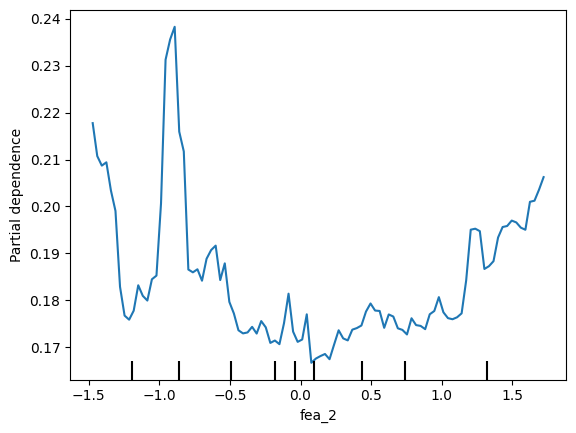

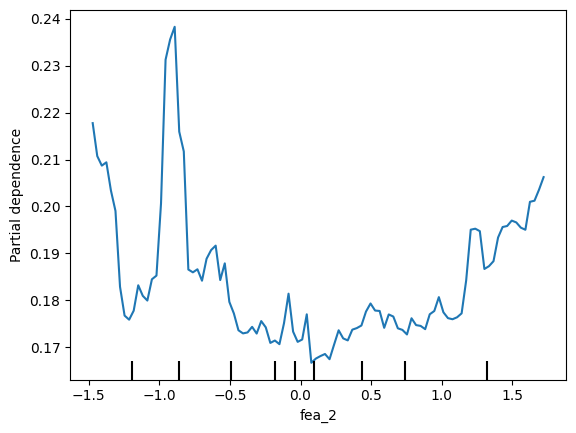

In [85]:
# !pip install shap

# import shap
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_train)

# # Plot for credit risky customers (class 0)
# shap.summary_plot(shap_values[0], X_train, plot_type="bar")

# # Plot for credit worthy customers (class 1)
# shap.summary_plot(shap_values[1], X_train, plot_type="bar")

from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(rf, X_train, [1], target=0)  # Credit Risky
PartialDependenceDisplay.from_estimator(rf, X_train, [1], target=1)  # Credit Worthy